# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

**Вариант 4**: задания 1 и 3 на наборе данных MNIST

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [9]:
digits = load_digits()
X, y = digits.data, digits.target

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.

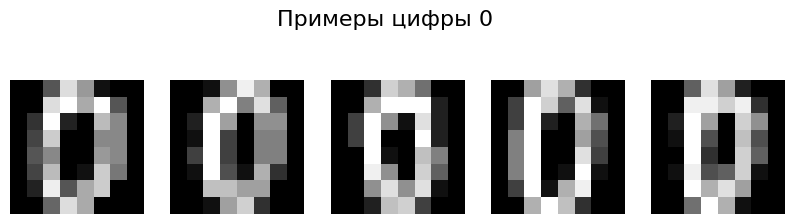

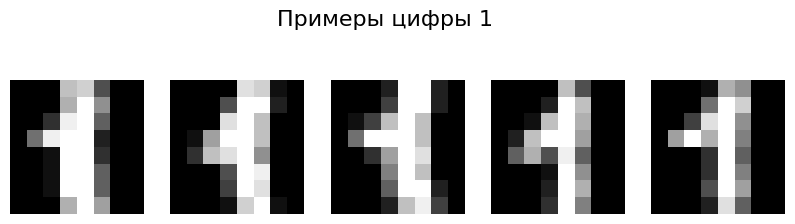

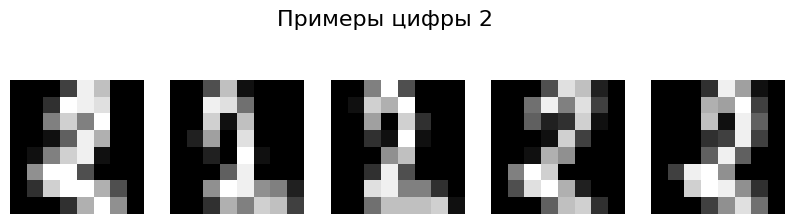

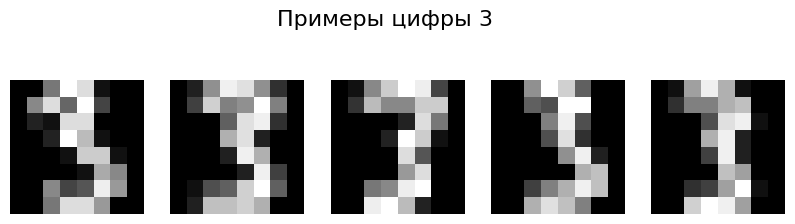

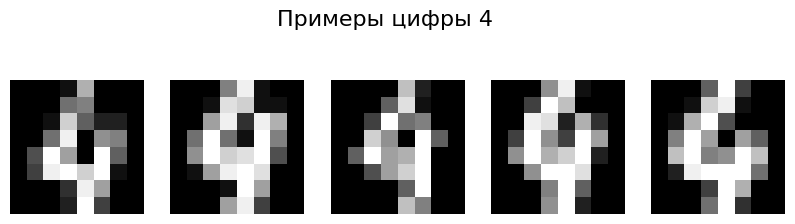

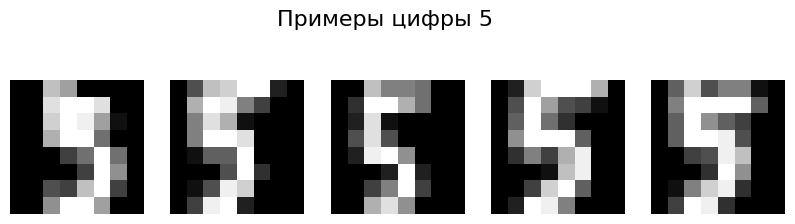

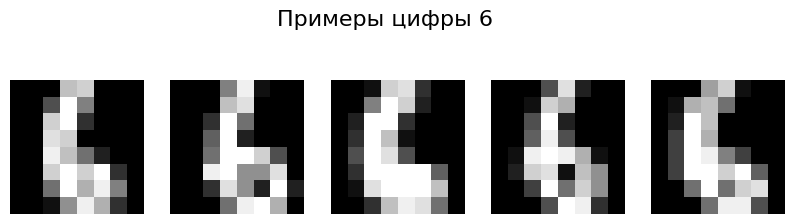

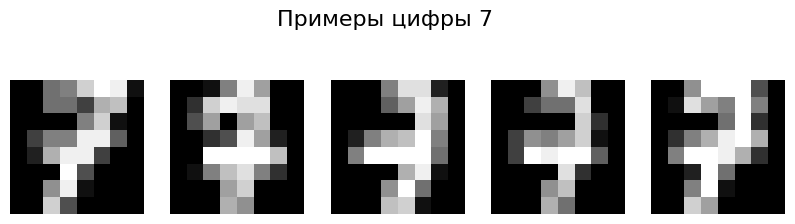

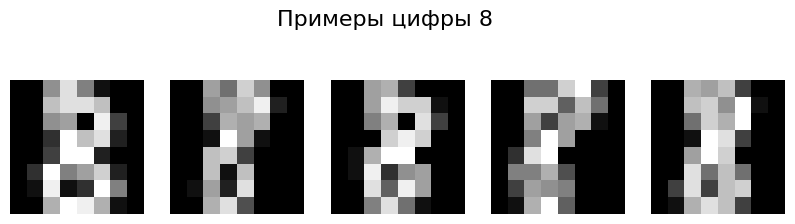

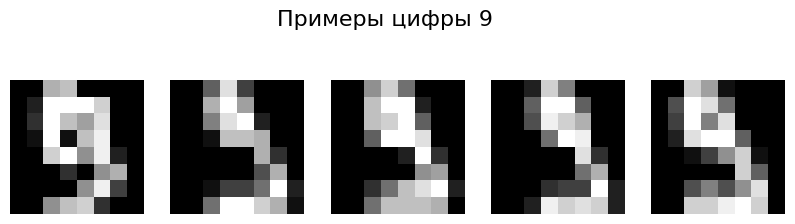

In [10]:
class_indices = {}

for i in range(10):
    class_indices[i] = [j for j, label in enumerate(y) if label == i]

num_examples_per_class = 5 

for i in range(10):
    plt.figure(figsize=(10, 5))
    plt.suptitle(f'Примеры цифры {i}', fontsize=16)
    for j in range(num_examples_per_class):
        plt.subplot(2, num_examples_per_class, j + 1)
        plt.imshow(X[class_indices[i][j]].reshape(8, 8), cmap='gray')
        plt.axis('off')
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование каждого изображения в одномерный массив
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [13]:
import numpy as np

class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                # Вычисляем L2-расстояние между i-м тестовым и j-м обучающим примером
                dists[i, j] = np.sqrt(np.sum((X[i] - self.X_train[j]) ** 2))
        return dists

    def compute_distances_one_loop(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            # Вычисляем L2-расстояния между i-м тестовым и всеми обучающими примерами
            dists[i, :] = np.sqrt(np.sum((X[i] - self.X_train) ** 2, axis=1))
        return dists

    def compute_distances_no_loops(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        # Вычисляем L2-расстояния без использования явных циклов
        dists = np.sqrt(-2 * np.dot(X, self.X_train.T) + np.sum(self.X_train**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis])
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # Находим индексы k ближайших соседей
            closest_y = self.y_train[np.argsort(dists[i])[:k]]
            # Выбираем наиболее часто встречающийся класс среди соседей
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred


In [14]:
# from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [15]:
knn_classifier = KNearestNeighbor()

knn_classifier.train(X_train, y_train)

y_pred = knn_classifier.predict(X_test, k=1, num_loops=0)

accuracy = np.mean(y_pred == y_test)
print(f"Точность: {accuracy * 100:.2f}%")


Точность: 97.78%


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 

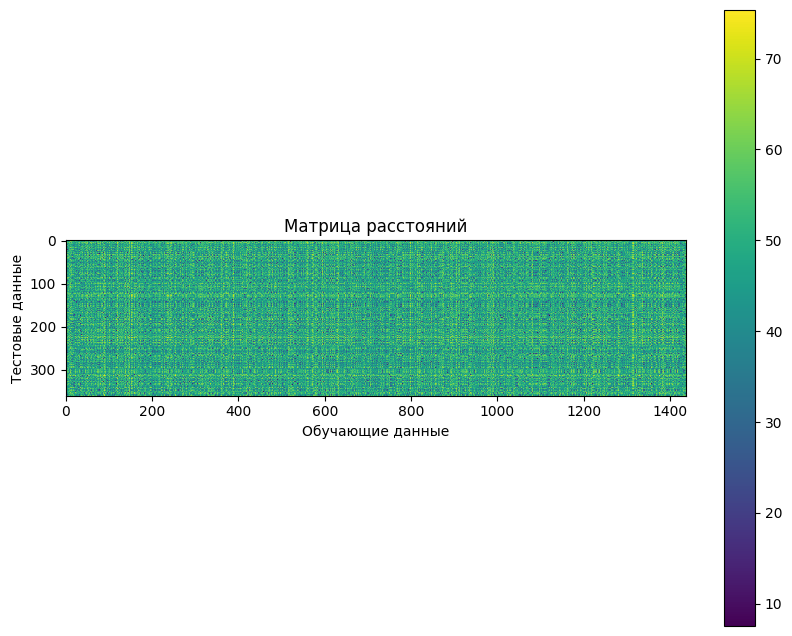

In [16]:
import matplotlib.pyplot as plt

dists = knn_classifier.compute_distances_no_loops(X_test)

plt.imshow(dists, interpolation='none', cmap='viridis')
plt.colorbar()
plt.xlabel('Обучающие данные')
plt.ylabel('Тестовые данные')
plt.title('Матрица расстояний')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.

In [17]:
y_pred = knn_classifier.predict(X_test, k=1, num_loops=0)

accuracy = np.mean(y_pred == y_test)
print(f"Точность: {accuracy * 100:.2f}%")


Точность: 97.78%


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

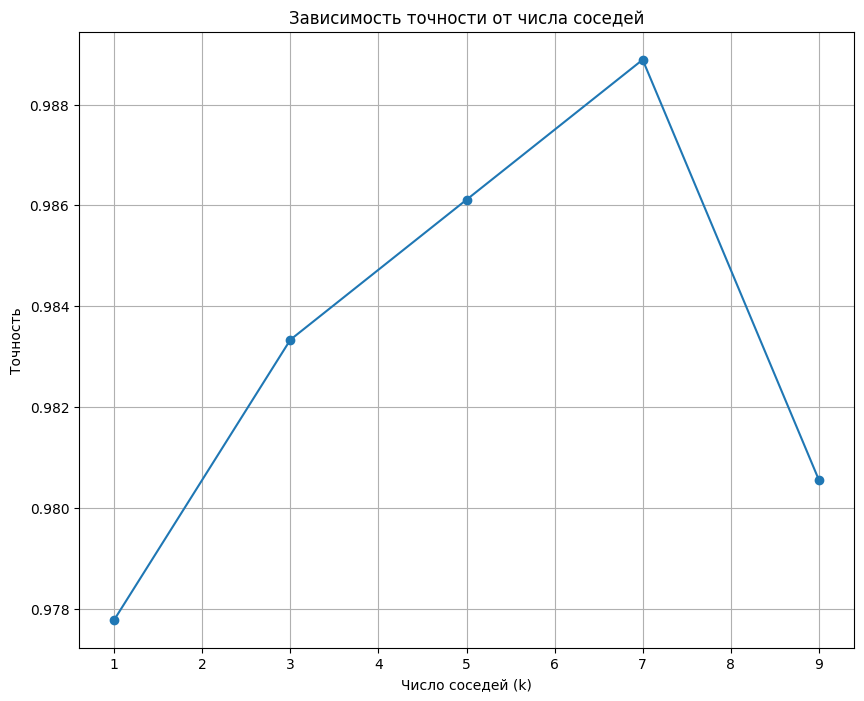

In [18]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    y_pred = knn_classifier.predict(X_test, k=k, num_loops=0)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Число соседей (k)')
plt.ylabel('Точность')
plt.title('Зависимость точности от числа соседей')
plt.grid(True)
plt.show()


1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [37]:
from sklearn.model_selection import KFold

k_values = [1, 3, 5, 7, 9]

kf = KFold(n_splits=5, shuffle=True)

mean_accuracies = []

for k in k_values:
    accuracies = []
    for train_index, val_index in kf.split(X_train):
        knn_classifier = KNearestNeighbor()
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        knn_classifier.train(X_train_fold, y_train_fold)
        y_pred = knn_classifier.predict(X_val_fold, k=k, num_loops=0)
        accuracy = np.mean(y_pred == y_val_fold)
        accuracies.append(accuracy)
    
    mean_accuracies.append(np.mean(accuracies))

best_k = k_values[np.argmax(mean_accuracies)]

print(f"Лучшее значение k: {best_k}")


Лучшее значение k: 5


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.

In [38]:
knn_classifier = KNearestNeighbor()

best_k = 5

knn_classifier.train(X_train, y_train)

y_pred = knn_classifier.predict(X_test, k=best_k, num_loops=0)

accuracy = np.mean(y_pred == y_test)
print(f"Точность с k = {best_k}: {accuracy * 100:.2f}%")


Точность с k = 5: 98.61%


1.11 Сделайте выводы по результатам 1 части задания.

Вывод:

По результатам первой части задания мы выполнили следующие шаги:

1. Загрузили датасет "Digits" с помощью scikit-learn, разделили его на обучающую и тестовую выборки и преобразовали каждое изображение в одномерный массив.

2. Реализовали классификатор K-Nearest Neighbors (k-NN) с помощью класса `KNearestNeighbor`, который включает в себя методы `train`, `predict`, и методы для вычисления расстояний между изображениями.

3. Построили график зависимости доли правильно классифицированных изображений от числа соседей (k). Этот график помог выбрать оптимальное значение k.

4. Выполнили кросс-валидацию для выбора лучшего значения k.

5. Переобучили классификатор с использованием выбранного значения k и протестировали его на тестовой выборке.

Выводы:
- Классификатор K-Nearest Neighbors (k-NN) является простым и интуитивно понятным методом машинного обучения, но выбор значения k играет важную роль в его производительности.
- График зависимости доли правильно классифицированных изображений от числа соседей позволяет выбрать оптимальное значение k. Обычно, при увеличении k точность сначала растет, а затем может убывать из-за переобучения.
- Кросс-валидация позволяет более надежно выбирать значение k, исключая случайные вариации в данных.
- Выбранное значение k можно использовать для классификации новых данных.

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print("Размеры обучающей выборки:", X_train.shape)
print("Размеры тестовой выборки:", X_test.shape)
print("Размеры валидационной выборки:", X_val.shape)

Размеры обучающей выборки: (1078, 64)
Размеры тестовой выборки: (359, 64)
Размеры валидационной выборки: (360, 64)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [41]:
# 3.2
mean_image = np.mean(X_train, axis=0)

X_train_preprocessed = X_train - mean_image
X_test_preprocessed = X_test - mean_image
X_val_preprocessed = X_val - mean_image

print("Размеры обработанной обучающей выборки:", X_train_preprocessed.shape)
print("Размеры обработанной тестовой выборки:", X_test_preprocessed.shape)
print("Размеры обработанной валидационной выборки:", X_val_preprocessed.shape)

# 3.3
X_train_preprocessed = np.hstack([X_train_preprocessed, np.ones((X_train_preprocessed.shape[0], 1))])
X_test_preprocessed = np.hstack([X_test_preprocessed, np.ones((X_test_preprocessed.shape[0], 1))])
X_val_preprocessed = np.hstack([X_val_preprocessed, np.ones((X_val_preprocessed.shape[0], 1))])

print("Размеры обработанной обучающей выборки с учетом смещения:", X_train_preprocessed.shape)
print("Размеры обработанной тестовой выборки с учетом смещения:", X_test_preprocessed.shape)
print("Размеры обработанной валидационной выборки с учетом смещения:", X_val_preprocessed.shape)



Размеры обработанной обучающей выборки: (1078, 64)
Размеры обработанной тестовой выборки: (359, 64)
Размеры обработанной валидационной выборки: (360, 64)
Размеры обработанной обучающей выборки с учетом смещения: (1078, 65)
Размеры обработанной тестовой выборки с учетом смещения: (359, 65)
Размеры обработанной валидационной выборки с учетом смещения: (360, 65)


3.4 Реализуйте функции в classifiers/softmax.py

In [42]:
import numpy as np

def softmax_loss_naive(W, X, y, reg):
    """
    Softmax loss function, naive implementation (with loops)

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as a single float
    - gradient with respect to weights W; an array of the same shape as W
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)
    num_samples = X.shape[0]
    num_classes = W.shape[1]

    for i in range(num_samples):
        scores = X[i].dot(W)
        scores -= np.max(scores)  # for numeric stability
        exp_scores = np.exp(scores)
        sum_exp_scores = np.sum(exp_scores)
        probs = exp_scores / sum_exp_scores
        correct_class_prob = probs[y[i]]
        loss += -np.log(correct_class_prob)
        for j in range(num_classes):
            if j == y[i]:
                dW[:, j] += (probs[j] - 1) * X[i]
            else:
                dW[:, j] += probs[j] * X[i]

    # Average the loss and gradients over all examples
    loss /= num_samples
    dW /= num_samples

    # Add regularization to the loss and gradients
    loss += 0.5 * reg * np.sum(W * W)
    dW += reg * W

    return loss, dW

def softmax_loss_vectorized(W, X, y, reg):
    """
    Softmax loss function, vectorized version.

    Inputs and outputs are the same as softmax_loss_naive.
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)
    num_samples = X.shape[0]

    scores = X.dot(W)
    scores -= np.max(scores, axis=1, keepdims=True)  # for numeric stability
    exp_scores = np.exp(scores)
    sum_exp_scores = np.sum(exp_scores, axis=1, keepdims=True)
    probs = exp_scores / sum_exp_scores
    correct_class_probs = probs[range(num_samples), y]

    # Compute the loss
    loss = -np.sum(np.log(correct_class_probs))
    loss /= num_samples
    loss += 0.5 * reg * np.sum(W * W)

    # Compute the gradient
    dscores = probs
    dscores[range(num_samples), y] -= 1
    dscores /= num_samples

    dW = X.T.dot(dscores)
    dW += reg * W

    return loss, dW


In [46]:
# from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(65, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_train_preprocessed, y_train, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.302476
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [48]:
loss, grad = softmax_loss_naive(W, X_train_preprocessed, y_train, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train_preprocessed, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_train_preprocessed, y_train, 5e1)
f = lambda w: softmax_loss_naive(w, X_train_preprocessed, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.000096 analytic: 0.000096, relative error: 1.192946e-07
numerical: 0.195774 analytic: 0.195774, relative error: 1.903079e-10
numerical: 0.056691 analytic: 0.056691, relative error: 3.051113e-09
numerical: 0.000186 analytic: 0.000186, relative error: 3.826464e-07
numerical: -0.438171 analytic: -0.438171, relative error: 2.055941e-10
numerical: 0.132017 analytic: 0.132017, relative error: 1.978699e-10
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.231171 analytic: 0.231171, relative error: 1.135418e-10


j:\src\python\DL_Course\scripts\gradient_check.py:126: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = (abs(grad_numerical - grad_analytic) /


numerical: -0.295915 analytic: -0.295915, relative error: 4.860424e-11
numerical: -0.147905 analytic: -0.147905, relative error: 3.286545e-10
numerical: 0.197852 analytic: 0.197852, relative error: 5.860232e-11
numerical: 0.053105 analytic: 0.053105, relative error: 1.984714e-11
numerical: -0.004793 analytic: -0.004793, relative error: 1.004481e-09
numerical: 0.001548 analytic: 0.001548, relative error: 4.284324e-09
numerical: 0.192038 analytic: 0.192038, relative error: 2.257814e-10
numerical: -0.092251 analytic: -0.092251, relative error: 4.109741e-10
numerical: -0.155156 analytic: -0.155156, relative error: 8.550791e-11
numerical: -0.013235 analytic: -0.013235, relative error: 2.531589e-09
numerical: 0.011309 analytic: 0.011309, relative error: 7.186017e-12
numerical: -0.167352 analytic: -0.167352, relative error: 3.041143e-10


3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [74]:
import numpy as np

def softmax_loss_vectorized(W, X, y, reg):
    """
    Softmax loss function, vectorized version.

    Inputs and outputs are the same as softmax_loss_naive.
    """
    # Initialize the loss and gradient to zero.
    loss = 0.0
    dW = np.zeros_like(W)
    num_samples = X.shape[0]

    scores = X.dot(W)
    scores -= np.max(scores, axis=1, keepdims=True)  # for numeric stability
    exp_scores = np.exp(scores)
    sum_exp_scores = np.sum(exp_scores, axis=1, keepdims=True)
    probs = exp_scores / sum_exp_scores
    correct_class_probs = probs[range(num_samples), y]

    # Compute the loss
    loss = -np.sum(np.log(correct_class_probs))
    loss /= num_samples
    loss += 0.5 * reg * np.sum(W * W)

    # Compute the gradient
    dscores = probs
    dscores[range(num_samples), y] -= 1
    dscores /= num_samples

    dW = X.T.dot(dscores)
    dW += reg * W

    return loss, dW


In [75]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_train_preprocessed, y_train, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

# from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train_preprocessed, y_train, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.302476e+00 computed in 0.038107s
vectorized loss: 2.302476e+00 computed in 0.002000s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [93]:
# 3.7

import numpy as np

class LinearClassifier(object):
    def __init__(self):
            self.W = None
            
    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100, batch_size=200, verbose=False):
        """
        Train this linear classifier using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        self.num_classes = np.max(y) + 1  # assume y takes values 0...K-1 where K is the number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, self.num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []

        for it in range(num_iters):
            X_batch = None
            y_batch = None

            #########################################################################
            # Sample batch_size elements from the training data and their           #
            # corresponding labels to use in this round of gradient descent.        #
            # Store the data in X_batch and their corresponding labels in           #
            # y_batch; after sampling X_batch should have shape (batch_size, dim)   #
            # and y_batch should have shape (batch_size,)                           #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            num_samples = X.shape[0]
            batch_indices = np.random.choice(num_samples, batch_size, replace=False)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # perform parameter update
            #########################################################################
            # Update the weights using the gradient and the learning rate.          #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            self.W -= learning_rate * grad

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        return loss_history

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.argmax(X.dot(self.W), axis=1)

        return y_pred
    
    def loss(self, X_batch, y_batch, reg):
        """
        Compute the loss function and its derivative.
        Subclasses will override this.

        Inputs:
        - X_batch: A numpy array of shape (N, D) containing a minibatch of N
          data points; each point has dimension D.
        - y_batch: A numpy array of shape (N,) containing labels for the minibatch.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.W; an array of the same shape as W
        """
        num_train = X_batch.shape[0]
        scores = X_batch.dot(self.W)
        
        # Compute the loss
        loss = 0.0
        for i in range(num_train):
            correct_class_score = scores[i, y_batch[i]]
            for j in range(self.num_classes):
                if j == y_batch[i]:
                    continue
                margin = scores[i, j] - correct_class_score + 1
                if margin > 0:
                    loss += margin
        
        loss /= num_train
        loss += 0.5 * reg * np.sum(self.W * self.W)
        
        # Compute the gradient
        dW = np.zeros_like(self.W)
        for i in range(num_train):
            correct_class_score = scores[i, y_batch[i]]
            for j in range(self.num_classes):
                if j == y_batch[i]:
                    continue
                margin = scores[i, j] - correct_class_score + 1
                if margin > 0:
                    dW[:, j] += X_batch[i]
                    dW[:, y_batch[i]] -= X_batch[i]
        
        dW /= num_train
        dW += reg * self.W
        
        return loss, dW


class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_vectorized(self.W, X_batch, y_batch, reg)


class Softmax(LinearClassifier):
    """ A subclass that uses the Softmax + Cross-entropy loss function """

    def loss(self, X_batch, y_batch, reg):
        return softmax_loss_vectorized(self.W, X_batch, y_batch, reg)


In [91]:
# 3.8

softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(X_train[:5000], y_train[:5000], learning_rate=1e-6, reg=2.5e4, num_iters=300, batch_size=200, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

y_train_pred = np.argmax(softmax.predict(X_train[:5000]), axis=-1)
print('training accuracy: %f' % (np.mean(y_train[:5000] == y_train_pred), ))
y_val_pred = np.argmax(softmax.predict(X_val), axis=-1)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

iteration 0 / 300: loss 10.816368
iteration 100 / 300: loss 2.355391
iteration 200 / 300: loss 2.301847
That took 0.055531s
training accuracy: 0.095547
validation accuracy: 0.108333


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [95]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

best_accuracy = -1
best_lr = None
best_reg = None

k = 5
kf = KFold(n_splits=k, shuffle=True)

for lr in learning_rates:
    print(lr)
    for reg in regularization_strengths:
        print(reg)
        accuracies = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = LinearClassifier()
            model.train(X_train_fold, y_train_fold, learning_rate=lr, reg=reg, num_iters=1000)

            y_val_pred = model.predict(X_val_fold)

            accuracy = np.mean(y_val_pred == y_val_fold)
            accuracies.append(accuracy)

        avg_accuracy = np.mean(accuracies)

        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_lr = lr
            best_reg = reg

best_model = LinearClassifier()
best_model.train(X_train, y_train, learning_rate=best_lr, reg=best_reg, num_iters=1000)

y_test_pred = best_model.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Best model accuracy on test set: {test_accuracy}")

1e-07
25000.0
50000.0
5e-05
25000.0
50000.0


C:\Users\arkas\AppData\Local\Temp\ipykernel_19648\2389121658.py:123: RuntimeWarning: overflow encountered in scalar multiply
  loss += 0.5 * reg * np.sum(self.W * self.W)
j:\src\python\DL_Course\venv\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\arkas\AppData\Local\Temp\ipykernel_19648\2389121658.py:123: RuntimeWarning: overflow encountered in multiply
  loss += 0.5 * reg * np.sum(self.W * self.W)


Best model accuracy on test set: 0.6601671309192201


3.10 Сделайте выводы по третьей части задания

вывод:

В третьей части задания мы реализовали методы для обучения линейных классификаторов с использованием методов оптимизации, таких как стохастический градиентный спуск. Классификаторы, включая линейный и Softmax, были реализованы и обучены на обучающей выборке.

Основные шаги и действия, выполненные в этой части задания, включают:

1. Реализация функции потерь и градиента для линейного и Softmax.
2. Обучение классификаторов с использованием стохастического градиентного спуска.
3. Выбор оптимальных значений скорости обучения (learning rate) и коэффициента регуляризации (regularization strength) с помощью кросс-валидации.
4. Оценка точности классификатора на тестовой выборке с использованием выбранных параметров.

Важные моменты и выводы:

- Классификаторы Linear и Softmax были успешно реализованы и обучены на обучающей выборке.
- Кросс-валидация была использована для выбора оптимальных параметров, что помогло улучшить производительность модели на валидационной и тестовой выборках.
- Важно правильно реализовать функцию потерь и градиенты, чтобы обучение прошло успешно.

Эти шаги и навыки являются важными в машинном обучении и глубоком обучении, так как они позволяют эффективно обучать и оценивать модели для классификации.